# Spirit CTF Source Code

In [112]:
# import libraries 
import numpy as np 
import pandas as pd  
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

## Unseen phenomena through a simple computer vision lens

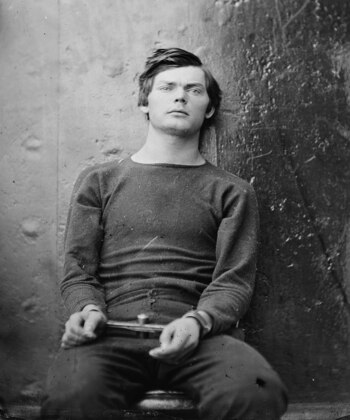

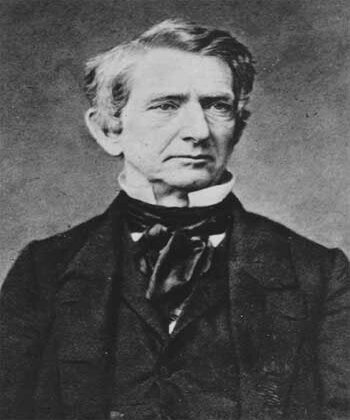

In [113]:
# Load two images
img1 = cv.imread('lewispayne.jpg')
img2 = cv.imread('seward.jpg')

cv2_imshow(img1)
cv2_imshow(img2)

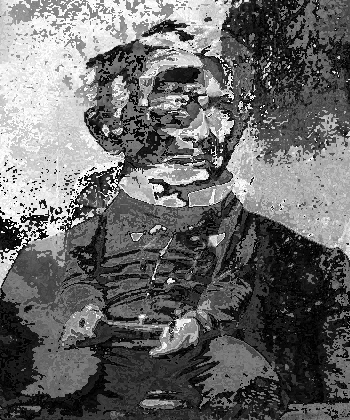

In [114]:
# Combine the two images using bitwise XOR
# the XOR operation takes two binary digits and provides these outputs:
# 0 XOR 0 = 0
# 0 XOR 1 = 1
# 1 XOR 0 = 1
# 1 XOR 1 = 0 

bitwiseXor = cv.bitwise_xor(img1, img2)
cv2_imshow(bitwiseXor)
  
# De-allocate any associated memory usage 
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

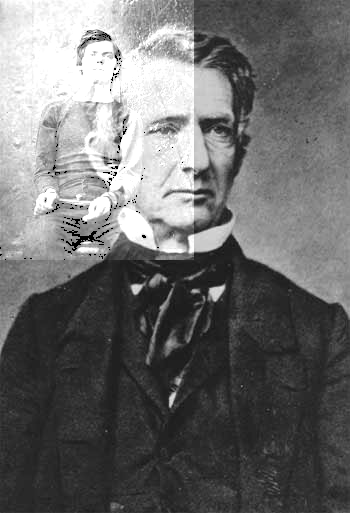

In [115]:
# Load two images
img1 = cv.imread('seward_ogsize.jpg')
img2 = cv.imread('payne_ogsize.jpeg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2_imshow(img1)
cv.waitKey(0)
cv.destroyAllWindows()

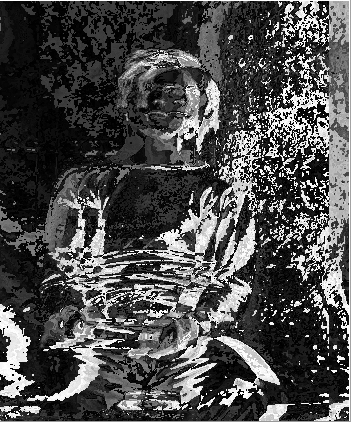

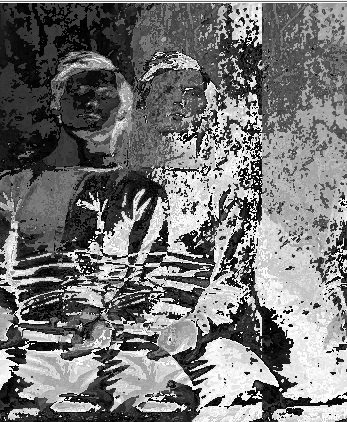

In [128]:
# stereogram images generated with the stegsolve tool
imgstereo17 = cv.imread('payne_stereogram17.png')
imgstereo86 = cv.imread('payne_stereogram86.png')

cv2_imshow(imgstereo17)
cv2_imshow(imgstereo86)

##Unseen phenomena through more advanced CV methods (contour map, fft, etc)

In [117]:
image = cv.imread('cezanneskulls.jpg')

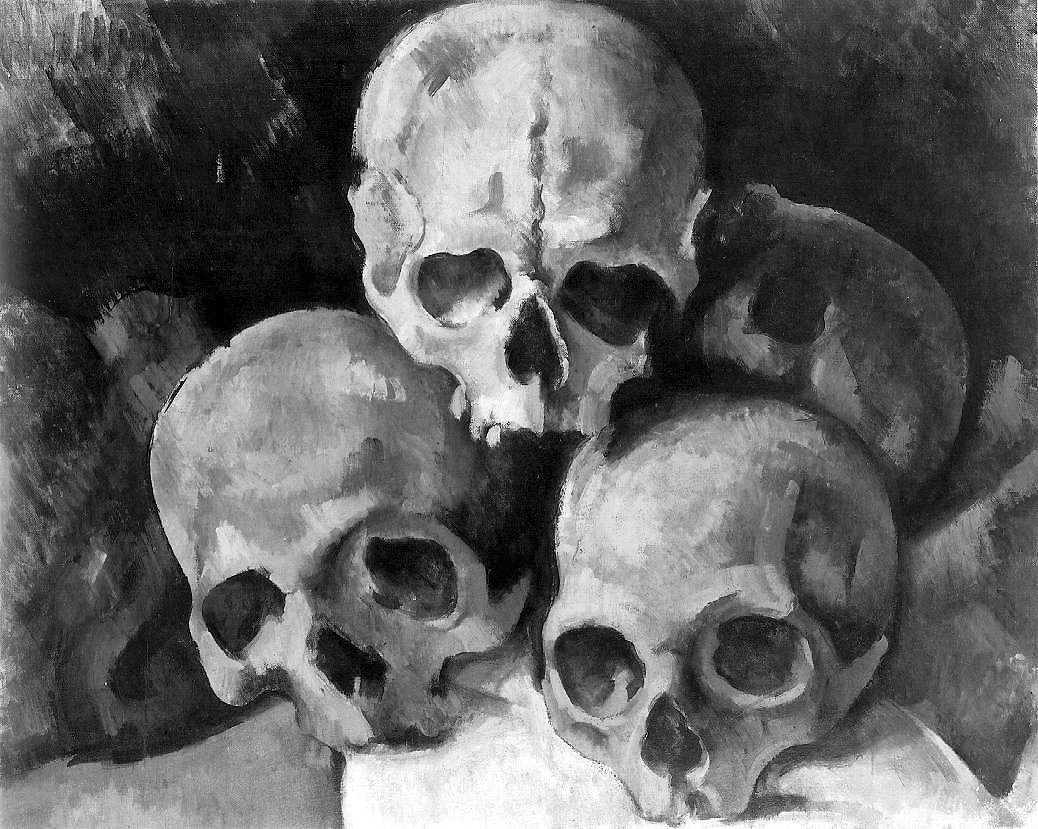

In [118]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

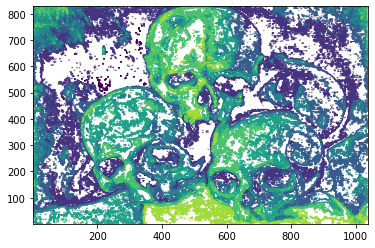

In [119]:
plt.contour(gray_image, origin = "image")

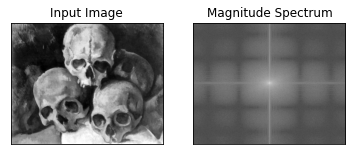

In [120]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

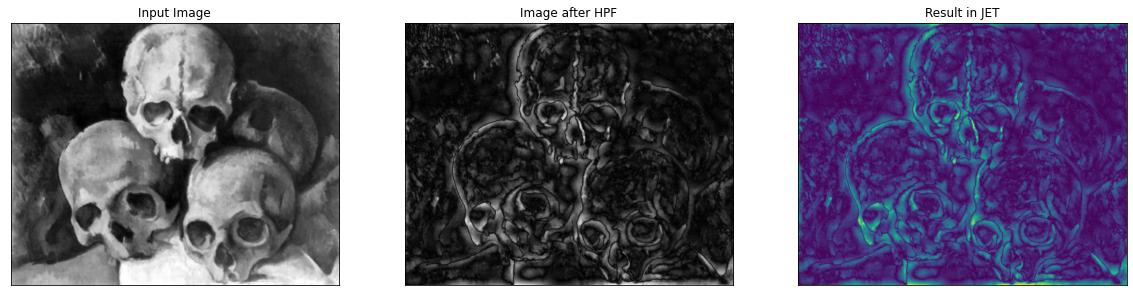

In [121]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

## Bonus: running FFT on stereogram to create a more authentic "blur"

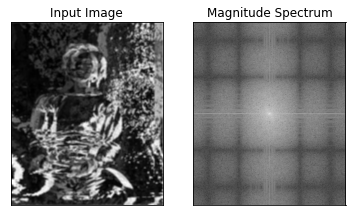

In [133]:
gray_image2 = cv.cvtColor(imgstereo17, cv.COLOR_BGR2GRAY)

# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image2,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

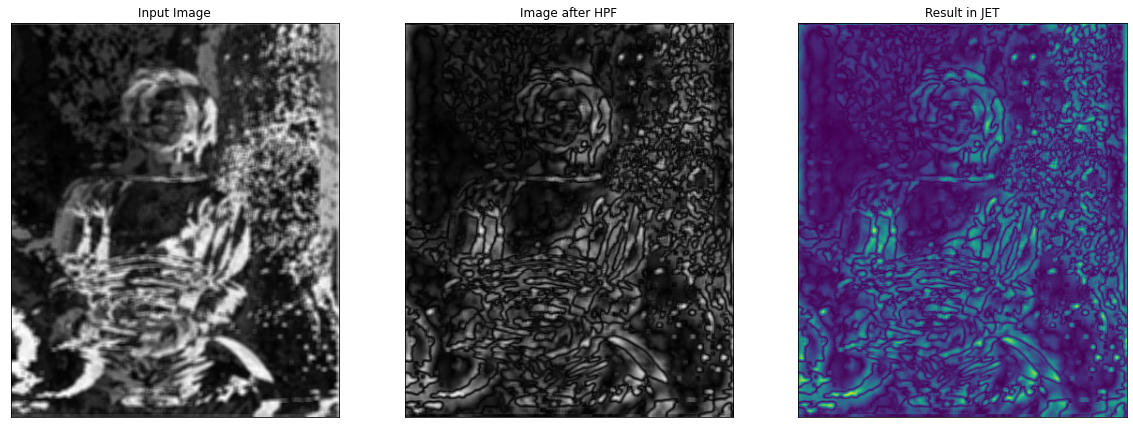

In [132]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()